In [91]:
# Biblioteker
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

In [92]:
# Utregning av bane
festepunkter_x = np.arange(0, 1400+200, 200)
festepunkter_y = np.array([300, 247, 159, 159, 195, 190, 131, 152,])

x = np.arange(0, 1400+1, 1)

cs = CubicSpline(festepunkter_x,festepunkter_y,bc_type='natural')
y = cs(x)
dy = cs(x,1)
ddy = cs(x,2)

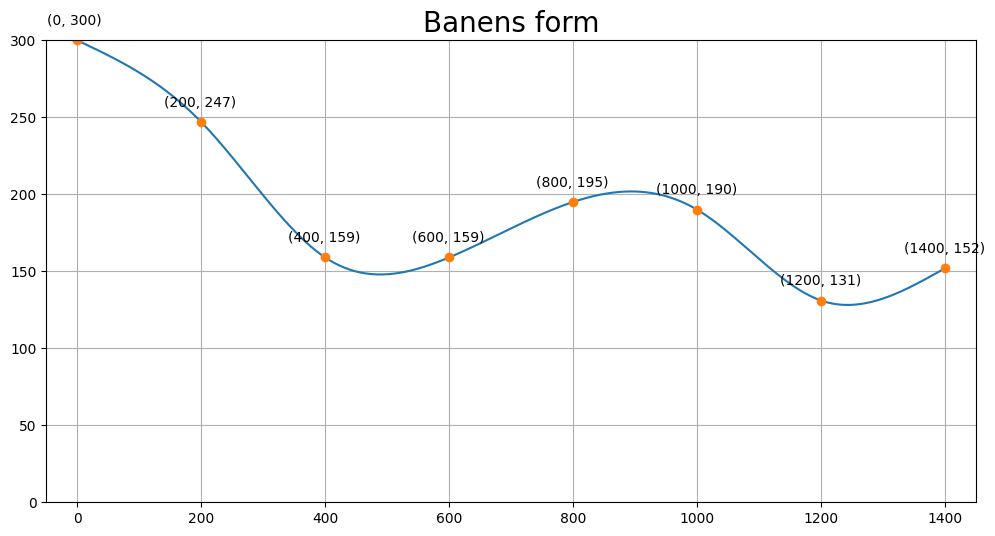

In [93]:
# Plot av banen y(x)
baneform = plt.figure('y(x)',figsize=(12,6))
plt.title('Banens form', fontsize=20)
plt.plot(x,y,festepunkter_x,festepunkter_y,'o')
plt.ylim(0,300)
plt.xlim(-50,1450)
plt.grid()

for i, j in zip(festepunkter_x, festepunkter_y):
   strlen = len(f"({str(i)}, {str(j)})")
   plt.text(i-strlen*6, j+10, '({}, {})'.format(i, j))

plt.show()

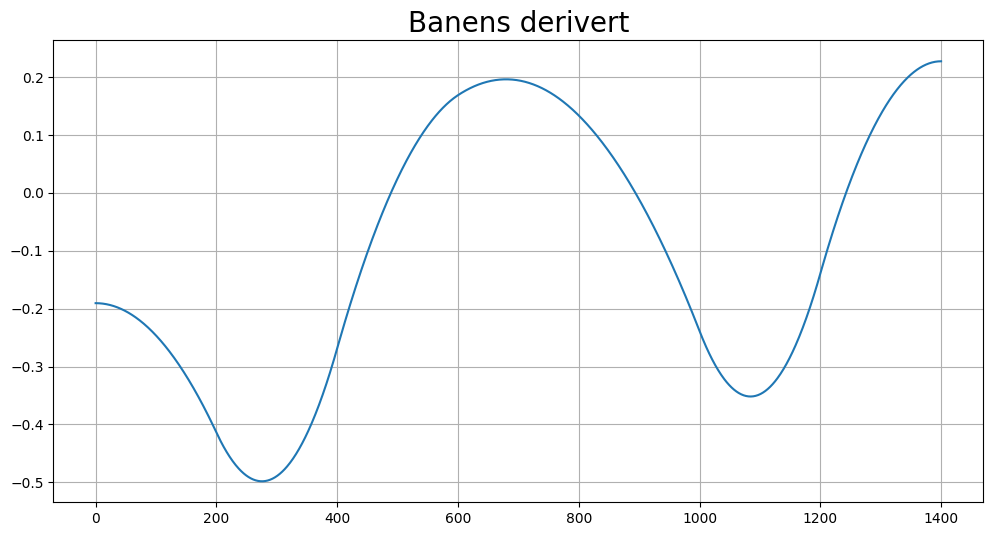

In [94]:
# Plot av derivert av bane
baneform = plt.figure('y(x)',figsize=(12,6))
plt.title('Banens derivert', fontsize=20)
plt.plot(x,dy)
plt.grid()
plt.show()

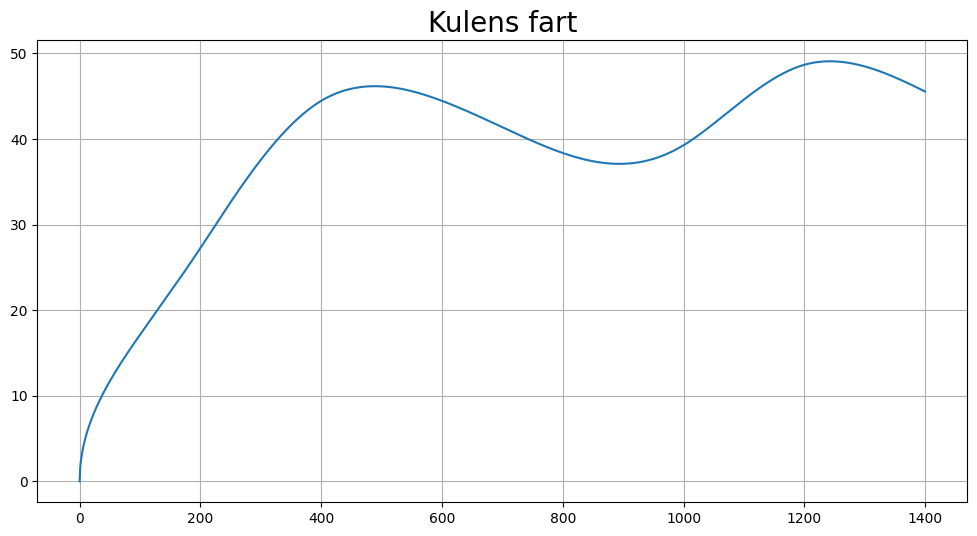

In [95]:
# Plot av kulas fart
def kfart(banehøyde):
    g = 9.81
    y0 = 300 # mm
    c = 2 / 5 # Fra oppgavetekst
    return np.sqrt(2*g*(y0-banehøyde)/(1+c))

baneform = plt.figure('y(x)',figsize=(12,6))
plt.title('Kulens fart', fontsize=20)
plt.plot(x, kfart(y))

plt.grid()
plt.show()

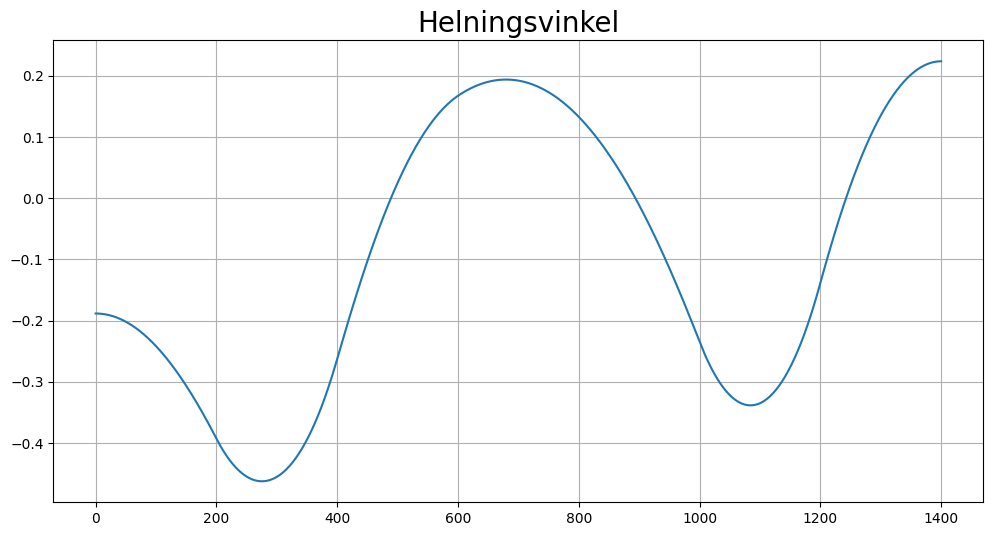

In [101]:
# Plot av helningsvinkel
def helning(dy):
    return np.arctan(dy)

baneform = plt.figure('y(x)',figsize=(12,6))
plt.title('Helningsvinkel', fontsize=20)
plt.plot(x, helning(dy))

plt.grid()
plt.show()